In [311]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [312]:
#importing libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly import graph_objects as go

In [313]:
#Reading the dataset

df=pd.read_excel('/content/drive/MyDrive/Practice Datasets/Task-4 batch 1 application.xlsx')
df_selected=pd.read_excel('/content/drive/MyDrive/Practice Datasets/Task-4 batch 1 application.xlsx','Selected')

In [314]:
#Removing unwanted columns
df.drop(['Purpose of joining?','Address','College Name','Comments'],
        axis=1,inplace=True)

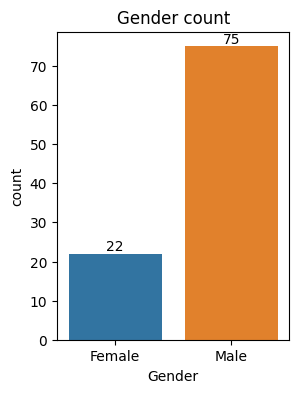

In [315]:
plt.figure(figsize=(3,4))
x=sns.countplot(df,x='Gender')
for i in x.containers:
  x.bar_label(i)
plt.title("Gender count")
plt.show()

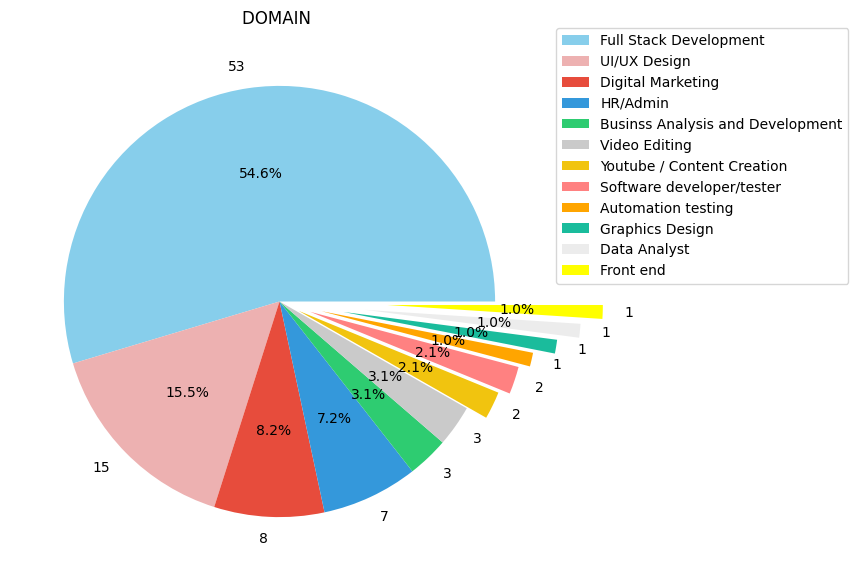

In [316]:
x=df['Domain'].value_counts()
my_explode=[0,0,0,0,0,0,0.1,.15,.2,.3,.4,.5]
plt.figure(figsize=(7,7))
plt.pie(x, labels=x.values, autopct='%0.1f%%', explode= my_explode,
        colors= ['#87CEEB','#EDB1B1','#E74C3C', '#3498DB','#2ECC71','#CACACA','#F1C40F',
                 '#FF8181','orange','#1ABC9C','#ECECEC','yellow'])
plt.legend(x.index, loc='upper left', bbox_to_anchor=(1, 1.02))
plt.title('DOMAIN ')
plt.show()

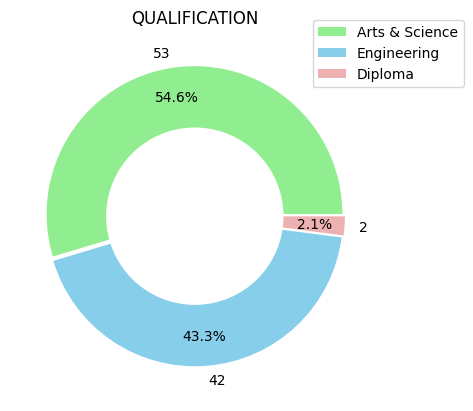

In [317]:
x=df['Qualification'].value_counts()
plt.pie(x, labels=x.values, autopct='%0.1f%%',
        colors=['#90EE90','#87CEEB','#EDB1B1'],
        pctdistance=0.80, explode=[.015,.015,.015])

centre_circle = plt.Circle((0, 0), 0.60, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.legend(x.index, loc='upper left', bbox_to_anchor=(.8,1.05))
plt.title('QUALIFICATION')
plt.show()

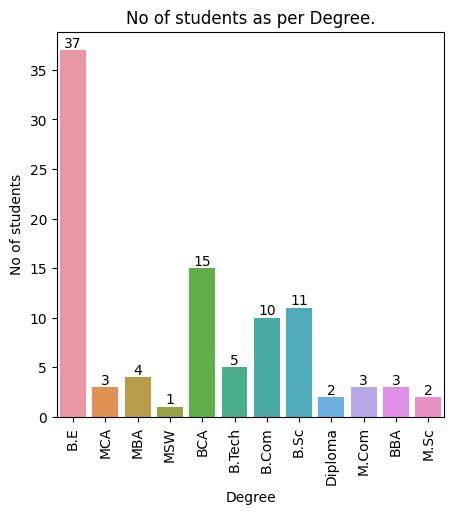

In [318]:
deg=df[df['Degree']!='Data Not Entered']
plt.figure(figsize=(5,5))
x=sns.countplot(data = deg, x ='Degree')
for i in x.containers:
    x.bar_label(i)
plt.title("No of students as per Degree.")
plt.xticks(rotation=90)
plt.ylabel('No of students')
plt.show()

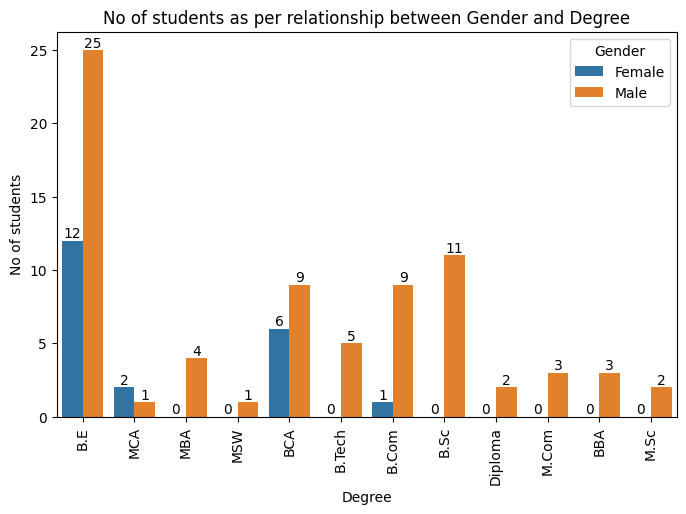

In [319]:
plt.figure(figsize=(8,5))
x=sns.countplot(data = deg, x ='Degree',hue='Gender')
for i in x.containers:
    x.bar_label(i)
plt.title("No of students as per relationship between Gender and Degree")
plt.xticks(rotation=90)
plt.ylabel('No of students')
plt.show()

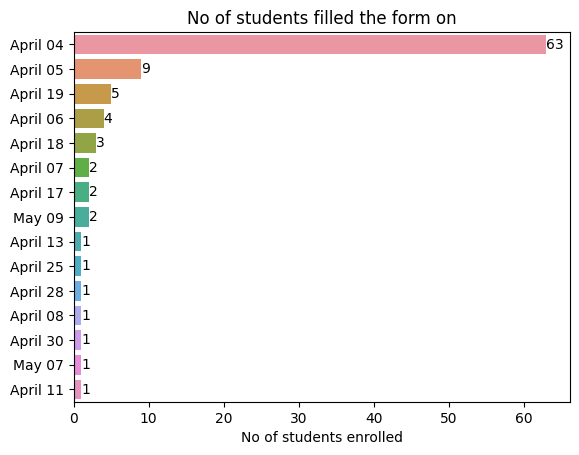

In [320]:
date_label=df['Date'].astype(str).apply(lambda a:a[:10])

def date_in_words(s):
  date=s[8:]
  if s[6:7]=='4':
    month='April '
  else:
    month='May '
  return month+date

date_label=date_label.apply(date_in_words)

date_in_words = pd.DataFrame({'date': date_label.unique(),
                     'students': date_label.value_counts().values})
fig = sns.barplot(x = 'students', y = 'date', data = date_in_words)
#plt.figure(figsize=(8,5))
for i in fig.containers:
    fig.bar_label(i)
plt.xlabel("No of students enrolled")
plt.ylabel("")
plt.title("No of students filled the form on")
plt.show(fig)

In [321]:
#Interactive chart

x=df['City'].value_counts().head()
fig = go.Figure(go.Funnelarea(text = x.axes[0],
                              values = x.values,
                              showlegend=False))
fig.update_layout(width=600,height=600,
                  title="STUDENTS FROM TOP 5 CITIES",
                  title_x=0.5, title_y=0.9, font=dict(size=16))
fig.show()

In [322]:
lap=df['Have laptop?'].value_counts()

fig = go.Figure(go.Indicator(
    mode="gauge+number",
    value=lap[0],
    domain={'x': [0, 1], 'y': [0, 1]},
    title={'text': f"Students having laptop out of {df.shape[0]}"},
    gauge={'axis': {'range': [0, 100], 'dtick': 5},
           'threshold': {'line': {'color': "red", 'width': 4},
                         'thickness': 0.75, 'value': 97}}
))
fig.update_layout(width=600, height=600)
fig.show()

In [323]:
#Interactive chart

degree_5=df['Degree'].value_counts().head()

fig = go.Figure(go.Funnel(y = degree_5.axes[0], x = degree_5.values))
fig.update_layout(width=700,height=500,
                  title="No of Students enrolled from Degree (top-5)",
                  title_x=0.5, title_y=0.9)
fig.show()

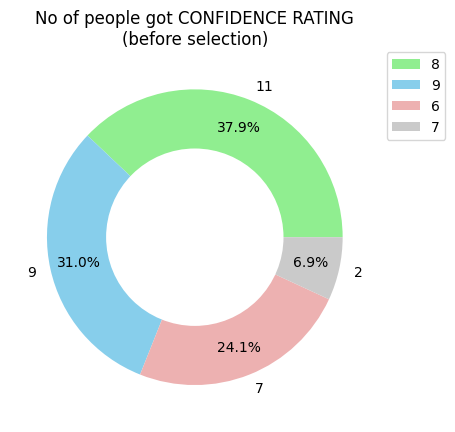

In [324]:
x=df['Confidence Rating'].value_counts().tail().head(4)

plt.pie(x, labels=x.values, autopct='%0.1f%%',
        colors=['#90EE90','#87CEEB','#EDB1B1','#CACACA'],
        pctdistance=0.80)

centre_circle = plt.Circle((0, 0), 0.60, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.legend(x.index, loc='upper left', bbox_to_anchor=(1, 1.02))
plt.title('No of people got CONFIDENCE RATING\n(before selection)')
plt.show()

#SELECTED STUDENTS VISUALISATION#

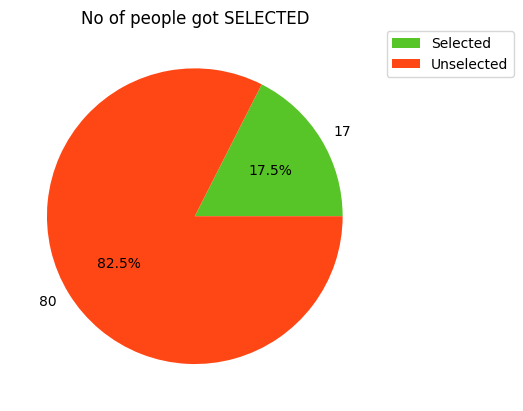

In [325]:
selected=df_selected.shape[0]
unselected=df.shape[0]-df_selected.shape[0]
x=[selected,unselected]
plt.pie(x, labels=x, autopct='%0.1f%%',
        colors=['#57C428','#FF4715'])
plt.legend(['Selected','Unselected'], loc='upper left', bbox_to_anchor=(1, 1.02))
plt.title('No of people got SELECTED')
plt.show()

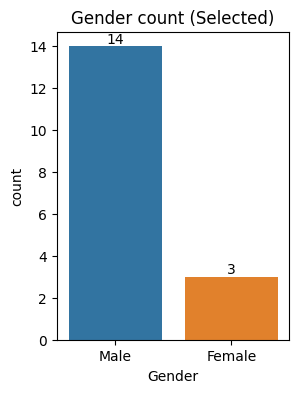

In [326]:
plt.figure(figsize=(3,4))
x=sns.countplot(df_selected,x='Gender')
for i in x.containers:
  x.bar_label(i)
plt.title("Gender count (Selected)")
plt.show()

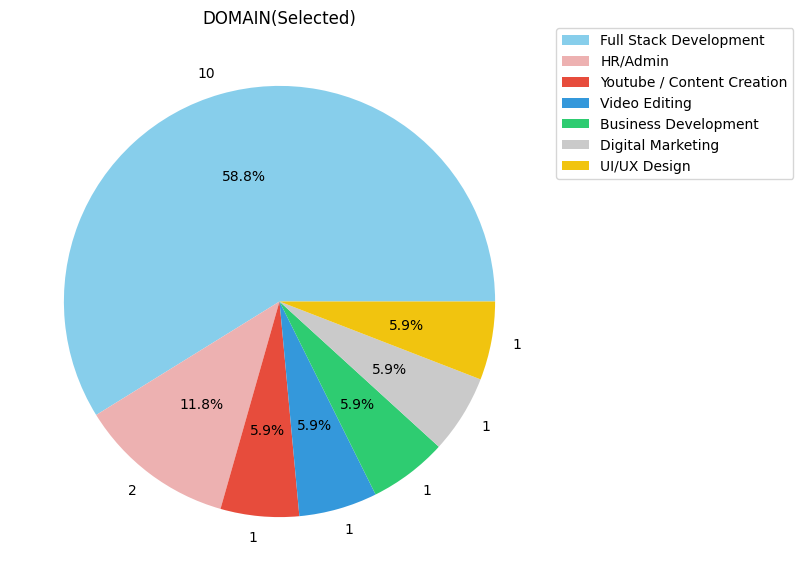

In [327]:
x=df_selected['Domain'].value_counts()
plt.figure(figsize=(7,7))
plt.pie(x, labels=x.values, autopct='%0.1f%%',
        colors= ['#87CEEB','#EDB1B1','#E74C3C',
                 '#3498DB','#2ECC71','#CACACA','#F1C40F'])
plt.legend(x.index, loc='upper left', bbox_to_anchor=(1, 1.02))
plt.title('DOMAIN(Selected)')
plt.show()

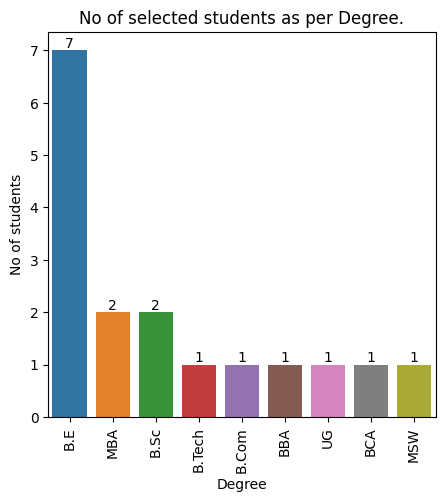

In [328]:
deg=df_selected[df_selected['Degree']!='Data Not Entered']
plt.figure(figsize=(5,5))
x=sns.countplot(data = deg, x ='Degree')
for i in x.containers:
    x.bar_label(i)
plt.title("No of selected students as per Degree.")
plt.xticks(rotation=90)
plt.ylabel('No of students')
plt.show()

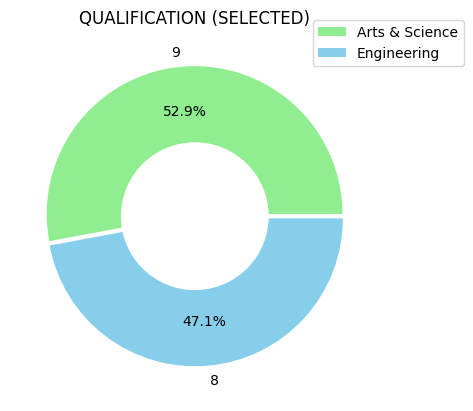

In [329]:
x=df_selected['Qualification'].value_counts()
plt.pie(x, labels=x.values, autopct='%0.1f%%',
        colors=['#90EE90','#87CEEB'],
        pctdistance=0.70, explode=[.015,.015])

centre_circle = plt.Circle((0, 0), 0.50, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.legend(x.index, loc='upper left', bbox_to_anchor=(.8,1.05))
plt.title('QUALIFICATION (SELECTED)')
plt.show()

In [330]:
#Interactive chart

x=df_selected['City'].value_counts()
fig = go.Figure(go.Funnelarea(text = x.axes[0],
                              values = x.values,
                              showlegend=False))
fig.update_layout(width=700,height=700,
                  title="CITIES OF SELECTED STUDENTS",
                  title_x=0.5, title_y=0.9,
                  font=dict(size=14))
fig.show()

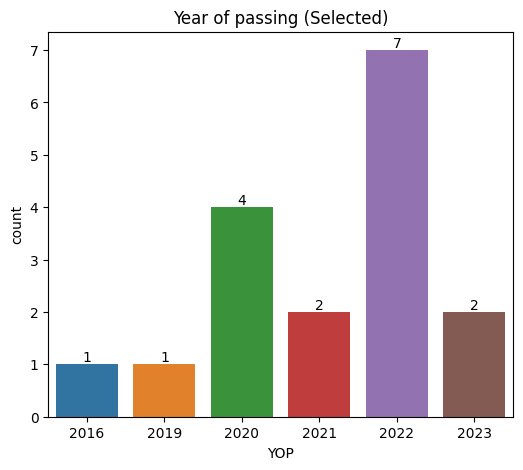

In [331]:
plt.figure(figsize=(6,5))
x=sns.countplot(df_selected,x='YOP')
for i in x.containers:
  x.bar_label(i)
plt.title("Year of passing (Selected)")
plt.show()